Clustering overview

So far, we've looked at regression and classification. These are both types of supervised machine learning. In supervised learning, you train an algorithm to predict an unknown variable from known variables.

Another major type of machine learning is called unsupervised learning. In unsupervised learning, we aren't trying to predict anything. Instead, we're finding patterns in data.

One of the main unsupervised learning techniques is called clustering. We use clustering when we're trying to explore a dataset, and understand the connections between the various rows and columns.

In [1]:
import pandas as pd
votes=pd.read_csv("114_congress.csv")
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Distance between Senators

To group Senators together, we need some way to figure out how "close" the Senators are to each other. We'll then group together the Senators that are the closest. We can actually discover this distance mathematically, by finding how similar the votes of two Senators are. The closer together the voting records of two Senators, the more ideologically similar they are (voting the same way indicates that you share the same views).

To find the distance between two rows, we can use Euclidean distance. The formula is:

Let's say we have two Senator's voting records:

name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047

Alexander,R,TN,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0

Ayotte,R,NH,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0

If we took only the numeric vote columns, we'd have this:

00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047

0,1,1,1,1,0,0,1,1,1,0,0,0,0,0

0,1,1,1,1,0,0,1,0,1,0,1,0,1,0

If we wanted to compute the Euclidean distance, we'd plug the vote numbers into our formula:

As you can see, these Senators are very similar! If you look at the votes above, they only disagree on 3 bills. The final Euclidean distance between these two Senators is 1.73.

To compute Euclidean distance in Python, we can use the euclidean_distances() method in the scikit-learn library. The code below will find the Euclidean distance between the Senator in the first row and the Senator in the second row.


In [2]:
from sklearn.metrics.pairwise import euclidean_distances

print(euclidean_distances(votes.iloc[0,3:].reshape(1, -1), votes.iloc[1,3:].reshape(1, -1)))
distance=euclidean_distances(votes.iloc[0,3:].reshape(1,-1),votes.iloc[2,3:].reshape(1,-1))

[[ 1.73205081]]


Initial clustering

We'll use an algorithm called k-means clustering to split our data into clusters. k-means clustering uses Euclidean distance to form clusters of similar Senators. We'll dive more into the theory of k-means clustering and build the algorithm from the ground up in a later mission. For now, it's important to understand clustering at a high level, so we'll leverage the scikit-learn library to train a k-means model.

The k-means algorithm will group Senators who vote similarly on bills together, in clusters. Each cluster is assigned a center, and the Euclidean distance from each Senator to the center is computed. Senators are assigned to clusters based on which one they are closest to. From our background knowledge, we think that Senators will cluster along party lines.

The k-means algorithm requires us to specify the number of clusters upfront. Because we suspect that clusters will occur along party lines, and the vast majority of Senators are either Republicans or Democrats, we'll pick 2 for our number of clusters.

We'll use the KMeans class from scikit-learn to perform the clustering. Because we aren't predicting anything, there's no risk of overfitting, so we'll train our model on the whole dataset. After training, we'll be able to extract cluster labels that indicate what cluster each Senator belongs to.

We can initialize the model like this:

kmeans_model = KMeans(n_clusters=2, random_state=1)

The above code will initialize the k-means model with 2 clusters, and a random state of 1 to allow for the same results to be reproduced whenever the algorithm is run.

We'll then be able to use the fit_transform() method to fit the model to votes and get the distance of each Senator to each cluster. The result will look like this:

array([[ 3.12141628,  1.3134775 ],

   [ 2.6146248 ,  2.05339992],

   [ 0.33960656,  3.41651746],

   [ 3.42004795,  0.24198446],

   [ 1.43833966,  2.96866004],

   [ 0.33960656,  3.41651746],

   [ 3.42004795,  0.24198446],

   [ 0.33960656,  3.41651746],

   [ 3.42004795,  0.24198446],

   [ 0.31287498,  3.30758755],

   ...

This is a NumPy array with two columns. The first column is the Euclidean distance from each Senator to the first cluster, and the second column is the Euclidean distance to the the second cluster. The values in the columns will indicate how "far" the Senator is from each cluster. The further away from the cluster, the less the Senator's voting history aligns with the voting history of the cluster.

In [3]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances=kmeans_model.fit_transform(votes.iloc[:,3:])

Exploring the clusters

We can use the Pandas method crosstab() to compute and display how many Senators from each party ended up in each cluster. The crosstab() method takes in two vectors or Pandas Series and computes how many times each unique value in the second vector occurs for each unique value in the first vector.

Here's an example:

is_smoker =       [0,1,1,0,0,1]

has_lung_cancer = [1,0,1,0,1,0]

A 0 means False, and a 1 means True. A crosstab for the two above lists would look like this:

has_lung_cancer    0     1

smoker

0                  1     2

1                  2     1

We can extract the cluster labels for each Senator from kmeans_model using kmeans_model.labels_, then we can make a table comparing these labels to votes["party"] with crosstab(). This will show us if the clusters tend to break down along party lines or not.

In [4]:
labels=kmeans_model.labels_
print(pd.crosstab(labels,votes["party"]))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


Exploring Senators in the wrong cluster

It looks like both of our clusters mostly broke down along party lines. The first cluster contains 41 Democrats, and both Independents. The second cluster contains 3 Democrats, and 54 Republicans.

No Republicans seem to have broken party ranks to vote with the Democrats, but 3 Democrats are more similar to Republicans in their voting than their own party. Let's explore these 3 in more depth so we can figure out why that is.

We can do this by subsetting votes to only select rows where the party column is D, and the labels variable is 1, indicating that the Senator is in the second cluster.

We can perform this subsetting with Pandas. The below code will select all Independents in the first cluster:

votes[(labels == 0) & (votes["party"] == "I")]

When subsetting a DataFrame with multiple conditions, each condition needs to be in parentheses, and separated by &.


In [5]:
democratic_outliers=votes[(labels==1) & (votes["party"]=="D")]
print(democratic_outliers)

        name party state  00001  00004  00005  00006  00007  00008  00009  \
42  Heitkamp     D    ND    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
56   Manchin     D    WV    0.0    1.0    0.0    1.0    0.0    0.0    1.0   
74      Reid     D    NV    0.5    0.5    0.5    0.5    0.5    0.5    0.5   

    00010  00020  00026  00032  00038  00039  00044  00047  
42    1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0  
56    1.0    1.0    0.0    0.0    1.0    1.0    0.0    0.0  
74    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5  


Plotting out the clusters

One great way to explore clusters is to visualize them using matplotlib. Earlier, we computed a senator_distances array that shows the distance from each Senator to the center of each cluster. We can treat these distances as x and y coordinates, and make a scatterplot that shows the position of each Senator. This works because the distances are relative to the cluster centers.

While making the scatterplot, we can also shade each point according to party affiliation. This will enable us to quickly look at the layout of the Senators, and see who crosses party lines.


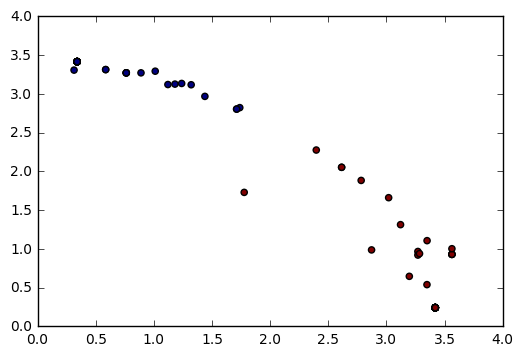

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=senator_distances[:,0], y=senator_distances[:,1], c=labels)
plt.show()

Finding the most extreme

The most extreme Senators are those who are the furthest away from one cluster. For example, a radical Republican would be as far from the Democratic cluster as possible. Senators who are in between both clusters are more moderate, as they fall in between the views of the two parties.

If we look at the first few rows of senator_distances, we can start to see who is more extreme:

[

       [ 3.12141628,  1.3134775 ], # Slightly moderate, far from cluster 1, close to cluster 2.

       [ 2.6146248 ,  2.05339992], # Moderate, far from cluster 1, far from cluster 2.

       [ 0.33960656,  3.41651746], # Somewhat extreme, very close to cluster 1, very far from cluster 2.

       [ 3.42004795,  0.24198446], # Fairly extreme, very far from cluster 1, very close to cluster 2.

       ...

   ]

We'll create a formula to find extremists -- we'll cube the distances in both columns of senator_distances, then add them together. The higher the exponent we raise a set of numbers to, the more separation we'll see between small values and low values. For instance, squaring [1,2,3] results in [1,4,9], and cubing it results in [1,8,27].

We cube the distances so that we can get a good amount of separation between the extremists who are farther away from a party, who have distances that look like extremist = [3.4, .24], and moderates, whose distances look like moderate = [2.6, 2]. If we left the distances as is, we'd end up with 3.4 + .24 = 3.64, and 2.6 + 2 = 4.6, which would make the moderate, who is between both parties, seem extreme. If we cube, we instead end up with 3.4 ** 3 + .24 ** 3 = 39.3, and 2.6 ** 3 + 2 ** 3 = 25.5, which correctly identifies the extremist.

Here's how the first few ratings would look:

[

       [ 3.12141628,  1.3134775 ], # 32.67

       [ 2.6146248 ,  2.05339992], # 26.5

       [ 0.33960656,  3.41651746], # 39.9

       [ 3.42004795,  0.24198446], # 40

       ...

   ]

We can cube every value in senator_distances by typing senator_distances ** 3. To find the sum across every row, we'll need to use the NumPy sum() method, and pass in the keyword argument axis=1.

In [8]:
extremism=[]
for i in senator_distances:
    extremism.append((i[0]**3) + (i[1]**3))
votes["extremism"] =extremism
votes.sort_values("extremism",ascending =False,inplace=True)
print(votes.head(10))

         name party state  00001  00004  00005  00006  00007  00008  00009  \
98     Wicker     R    MS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
53   Lankford     R    OK    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
69       Paul     R    KY    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
80      Sasse     R    NE    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
26       Cruz     R    TX    0.0    1.0    1.0    0.0    1.0    0.0    1.0   
48    Johnson     R    WI    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
47    Isakson     R    GA    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
65  Murkowski     R    AK    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
64      Moran     R    KS    0.0    1.0    1.0    1.0    1.0    0.0    1.0   
30       Enzi     R    WY    0.0    1.0    1.0    1.0    1.0    0.0    1.0   

    00010  00020  00026  00032  00038  00039  00044  00047  extremism  
98    0.0    1.0    1.0    0.0    0.0    1.0    0.0    0.0  46.250476

Clustering is a powerful way to explore data and find patterns. Unsupervised learning is very commonly used with large datasets where it isn't obvious how to start with supervised machine learning. In general, it's a good idea to try unsupervised learning to explore a dataset before trying to use supervised learning machine learning models.

In a future mission, we'll dive more into the k-means clustering algorithm and build our own from the ground up.